# DATA 690 Deliverable #3 - Final Project

## Project Background and Details:
COVID-19 is an ongoing pandemic that started earlier this year (March 2020) and as the pandemic continues to grow in cases and deaths, just reaching over 200,000 American deaths recently, it's important to see how it has effected the local area.  The Maryland government website has information on the number of cases in Maryland overall and broken up in several categories to be explored.

The link where I retrieved the dataset used in this project is here: https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-MASTER-Case-Tracker/mgd3-qk8t


The dataset used contains data from March 4th to November 3rd (the most recent available and updated data)




## Goal of the Exploration: 
To understand which Maryland counties and age groups were hit the hardest during the COVID-19 pandemic

### Step 1: Loading in the Data
First we need to retrieve the most recent excel spreadsheet of the data (from the MD website) and load it into a panda dataframe. The data is going to be the main focus of this project.


I also choose to load in modules as I see needed during the project.

mathplotlib - modules that helps create bar charts, line graphs, etc

pandas - helps store the excel sheet in an easy to access dataframe

In [1]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# loading the COVID-19 csv file
data = pd.read_csv("MD_COVID-19_-_MASTER_Case_Tracker.csv")

### Step 2: Previewing the Data

The next important step is to get a feel of the data we're working from.

Using panda's head() and tail() give good preview of the beginning 5 entries and last 5 entries in the dataset and using sample gives random entries from the dataset.  It will be good for giving a feel of how the data is structure.

We also want to use shape to see the overall size of the dataset we're going to be working with.

In [2]:
# preview the data
print(data.head())
print(data.tail())

  Filter              ReportDate  ...  pDeathOther  pDeathNotAvail
0    NaN  03/04/2020 03:00:00 PM  ...          NaN             NaN
1    NaN  03/05/2020 03:00:00 PM  ...          NaN             NaN
2    NaN  03/06/2020 03:00:00 PM  ...          NaN             NaN
3    NaN  03/07/2020 03:00:00 PM  ...          NaN             NaN
4    NaN  03/08/2020 02:00:00 PM  ...          NaN             NaN

[5 rows x 159 columns]
    Filter              ReportDate  ...  pDeathOther  pDeathNotAvail
245    NaN  11/04/2020 03:00:00 PM  ...          0.0             0.0
246    NaN  11/05/2020 03:00:00 PM  ...          0.0             0.0
247    NaN  11/06/2020 03:00:00 PM  ...          0.0             1.0
248    NaN  11/07/2020 03:00:00 PM  ...          0.0             2.0
249      s  11/08/2020 03:00:00 PM  ...          0.0             1.0

[5 rows x 159 columns]


In [3]:
# preview the shape of the data
print("Rows, Columns:" , data.shape)

Rows, Columns: (250, 159)


In [4]:
# get a little more information on the data
print(data.sample(10))

    Filter              ReportDate  ...  pDeathOther  pDeathNotAvail
246    NaN  11/05/2020 03:00:00 PM  ...          0.0             0.0
35     NaN  04/08/2020 02:00:00 PM  ...          NaN             NaN
55     NaN  04/28/2020 02:00:00 PM  ...          0.0            12.0
57     NaN  04/30/2020 02:00:00 PM  ...          0.0             8.0
37     NaN  04/10/2020 02:00:00 PM  ...          NaN             NaN
133    NaN  07/15/2020 02:00:00 PM  ...          0.0             1.0
179    NaN  08/30/2020 02:00:00 PM  ...          0.0             3.0
194    NaN  09/14/2020 02:00:00 PM  ...          0.0             0.0
228    NaN  10/18/2020 02:00:00 PM  ...          0.0             1.0
120    NaN  07/02/2020 02:00:00 PM  ...          0.0             1.0

[10 rows x 159 columns]


Overall this is a rather small dataset compared to others.  It only has 245 rows and 159 columns.  

Most data sets don't have quite so many columns but not all of the columns contain important data for what we're going to analyze. For instance they have a bedTotal column which is total number of hospital beds.

We are going to analyze the number of covid cases by county and age group so we only need a certain group of columns (listed below).

### Important Columns for Analysis and their Meaning:

ReportDate	- the timestamp for cases reported

ALLE	- Allegany County Cumulative Cases

ANNE	- Anne Arundel County Cumulative Cases

BALT	- Baltimore County Cumulative Cases

BCITY	- Baltimore City Cumulative Cases

CALV	- Calvert County Cumulative Cases

CARO	- Caroline County Cumulative Cases

CARR	- Carroll County Cumulative Cases

CECI - Cecil County Cumulative Cases

CHAR	- Charles County Cumulative Cases

DORC	- Dorchester County Cumulative Cases

FRED - Frederick County Cumulative Cases

GARR - Garrett County Cumulative Cases

HARF	- Harford County Cumulative Cases

HOWA	- Howard County Cumulative Cases

KENT	- Kent County Cumulative Cases

MONT	- Montgomery County Cumulative Cases

PRIN	- Prince George's County Cumulative Cases

QUEE	- Queen Anne's County Cumulative Cases

SOME	- Somerset County Cumulative Cases

STMA - St. Mary's County Cumulative Cases

TALB - Talbot County Cumulative Cases

WASH - Washington County Cumulative Cases

WICO - Wicomico County Cumulative Cases

WORC - Worcester County Cumulative Cases

case0to9	- Cumulative Cases for people 0 to 9

case10to19	- Cumulative Cases for people 10 to 19

case20to29	- Cumulative Cases for people 20 to 29

case30to39 - Cumulative Cases for people 30 to 39

case40to49 - Cumulative Cases for people 40 to 49

case50to59 - Cumulative Cases for people 50 to 59

case60to69 - Cumulative Cases for people 60 to 69

case70to79 - Cumulative Cases for people 70 to 79

case80plus - Cumulative Cases for people 80 plus

Now there is a separate column stating deaths for the same groups.

Examples: 

deathANNE - Cumulative Deaths from COVID-19 Anne Arundel

death20to29 - Cumulative deaths for people 20 to 29 

In the interest of saving space, I will not list them, but they will be used for analysis below.

### Step 3: Preparing the Data

Now this is important step we need to complete.  The main thing we need to clean is the ReportDate column.

As is the column is formatted as MM/DD/YYYY HH:MM:SS and it provides a lot of information, but most is not needed.  The time of the day and year are not important in our analysis since we are working within the same year and there are not multiple reported times per day, it is just when the system reported the data that day.

In addition to that, the long date format makes charts x-axis nearly impossible to tell what data point you're looking at.

For those reason, we're gonna create a shorter column in the dataframe called "ShortDate" that just has the month and day (MM/DD) to shorten the information.

In [5]:
# create a new column in dataframe to include shorter date
data['ShortDate'] = data['ReportDate'].astype(str).str.slice(start = 0, stop = 5)
print(data['ShortDate']) 

0      03/04
1      03/05
2      03/06
3      03/07
4      03/08
       ...  
245    11/04
246    11/05
247    11/06
248    11/07
249    11/08
Name: ShortDate, Length: 250, dtype: object


With this shorten date, we're almost ready to start the analysis

(Originally I thought setting ShortDate as the index for pandas would simplify the creating charts later on, however it did not appear so when attempting.  Therefore I chose to get rid of the step.)

### Step 4: Things to Understand Before Analysis

COVID-19 is an ongoing pandemic and resources are growing as we learn more about the virus and how to combat it.  Therefore there's a few things to be kept in mind as we're researching the numbers:

*   Tests have be stated to not always be 100% accurate. The numbers are not 100% day to day. Chart 1 does a good job of showing how much each day can vary.
*   Towards the beginning of the pandemic there was not as much testing available for individuals as there is now.  The amount of testing done is growing as we continue to tackle the virus.  The beginning numbers might not be an good reflection of actual cases of COVID-19. Chart 2 and 3 show how COVID-19 testing has ramped up.



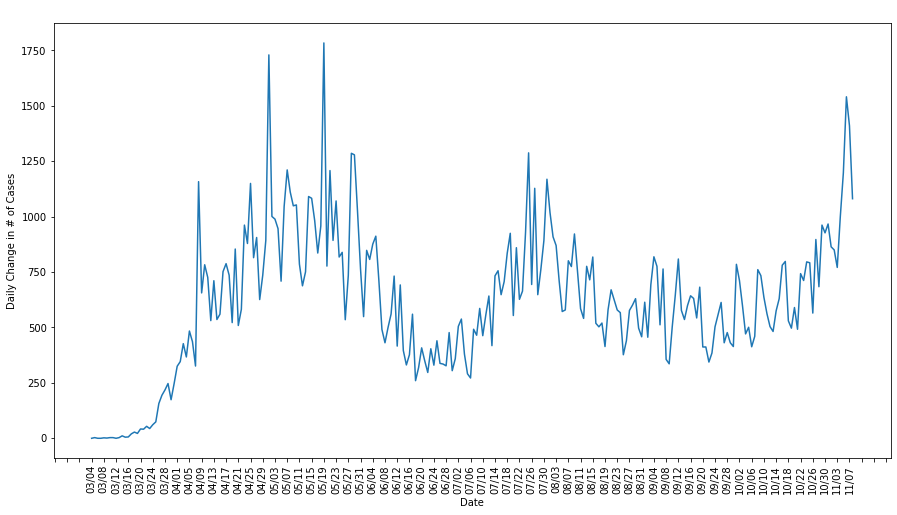

In [9]:
# CHART 1
# plot the change in number of COVID-19 daily cases 

fig, ax = plt.subplots()
fig.set_size_inches(15,8)

plt.plot(data['ShortDate'], data["CaseDelta"])
plt.title('COVID-19 Daily Change in Cases',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))
plt.ylabel('Daily Change in # of Cases')

plt.show()

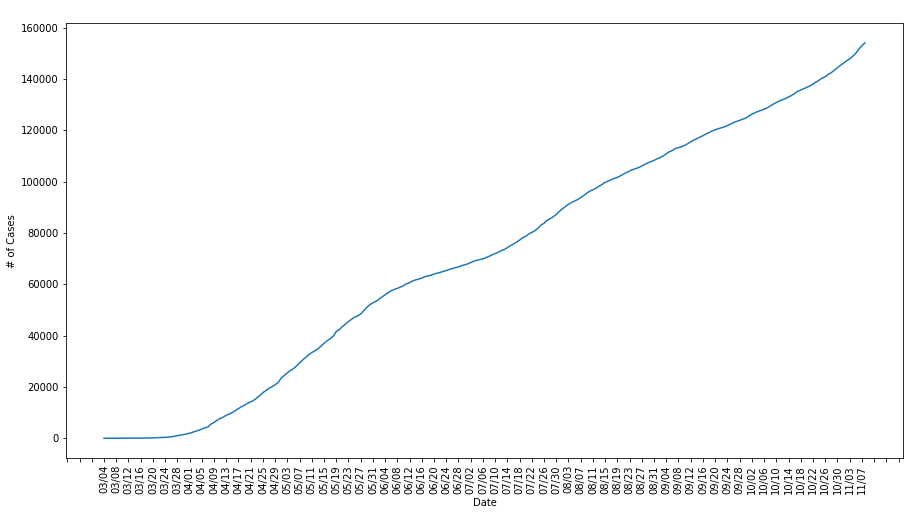

In [10]:
# CHART 2
# get a rough look of the COVID-19 cases
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

plt.plot(data["ShortDate"],data["TotalCases"])
plt.title('COVID-19 Cases',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))
plt.ylabel('# of Cases')
plt.show()

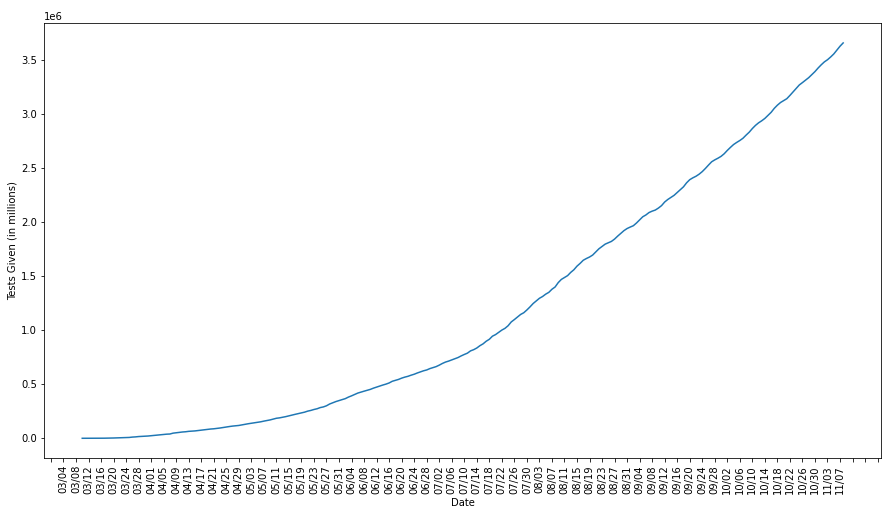

In [11]:
# CHART 3
# plot the total number of tests for COVID-19 given
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

plt.plot(data["ShortDate"],data["TotalTests"])
plt.title('COVID-19 Tests Given',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))
plt.ylabel('Tests Given (in millions)')
plt.show()

### Step 5: Analyze the Data

Our goal is to see to better understand how each county and age group has been impacted by the virus.

Let's start with analyzing number of overall cases for each county.  It quite lengthy and repetitive in order to make sure each MD county got their own unique identifying color to be able to distinguish who is who on the chart.

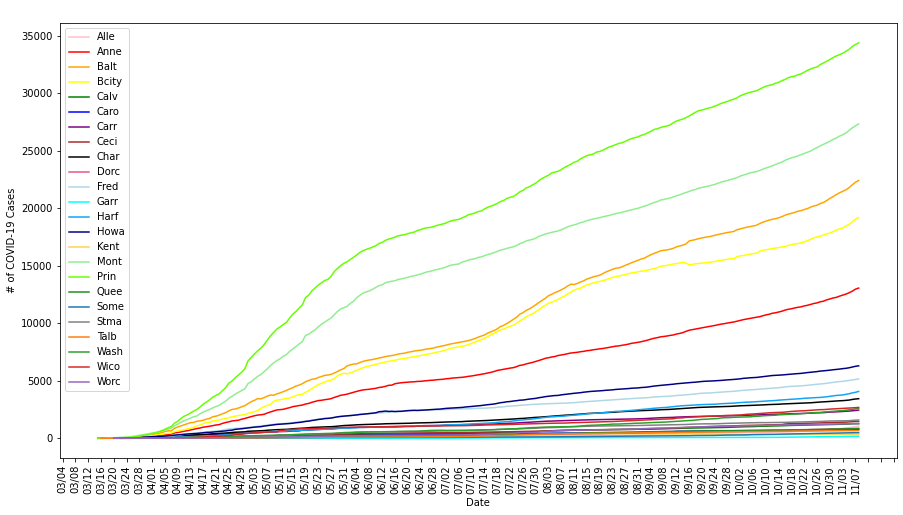

In [12]:
# plot a comparison of COVID-19 cases in each county
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
x = data["ShortDate"]
y1 = data["ALLE"]
y2 = data["ANNE"]
y3 = data["BALT"]
y4 = data["BCITY"]
y5 = data["CALV"]
y6 = data["CARO"]
y7 = data["CARR"]
y8 = data["CECI"]
y9 = data["CHAR"]
y10 = data["DORC"]
y11 = data["FRED"]
y12 = data["GARR"]
y13 = data["HARF"]
y14 = data["HOWA"]
y15 = data["KENT"]
y16 = data["MONT"]
y17 = data["PRIN"]
y18 = data["QUEE"]
y19 = data["SOME"]
y20 = data["STMA"]
y21 = data["TALB"]
y22 = data["WASH"]
y23 = data["WICO"]
y24 = data["WORC"]

ax.plot(x,y1, label="Alle", color='pink')
ax.plot(x,y2, label='Anne', color='red')
ax.plot(x,y3, label='Balt', color='orange')
ax.plot(x,y4, label='Bcity', color='yellow')
ax.plot(x,y5, label='Calv', color='green')
ax.plot(x,y6, label='Caro', color='blue')
ax.plot(x,y7, label='Carr', color='purple')
ax.plot(x,y8, label='Ceci', color='brown')
ax.plot(x,y9, label='Char', color='black')
ax.plot(x,y10, label='Dorc',color='#e75480')
ax.plot(x,y11, label='Fred', color='#add8e6')
ax.plot(x,y12, label='Garr', color='#00FFFF')
ax.plot(x,y13, label='Harf', color='#10A5F5')
ax.plot(x,y14, label='Howa', color='#000080')
ax.plot(x,y15, label='Kent', color='#FDD451')
ax.plot(x,y16, label='Mont', color='#90ee90')
ax.plot(x,y17, label='Prin', color='#66ff00')
ax.plot(x,y18, label='Quee', color='#228B22')
ax.plot(x,y19, label='Some')
ax.plot(x,y20, label='Stma', color='gray')
ax.plot(x,y21, label='Talb')
ax.plot(x,y22, label='Wash')
ax.plot(x,y23, label='Wico')
ax.plot(x,y24, label='Worc')
ax.legend()
plt.title('COVID-19 Cases in Each County',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))
plt.ylabel('# of COVID-19 Cases')
plt.show()

The chart can be slighly difficult to read with so many counties on at once, but it appears that Prince George's County, Montgomery County, Baltimore County and Baltimore City are the majority of the COVID cases for MD.

Let's see if the deaths for COVID-19 follow the same trend.

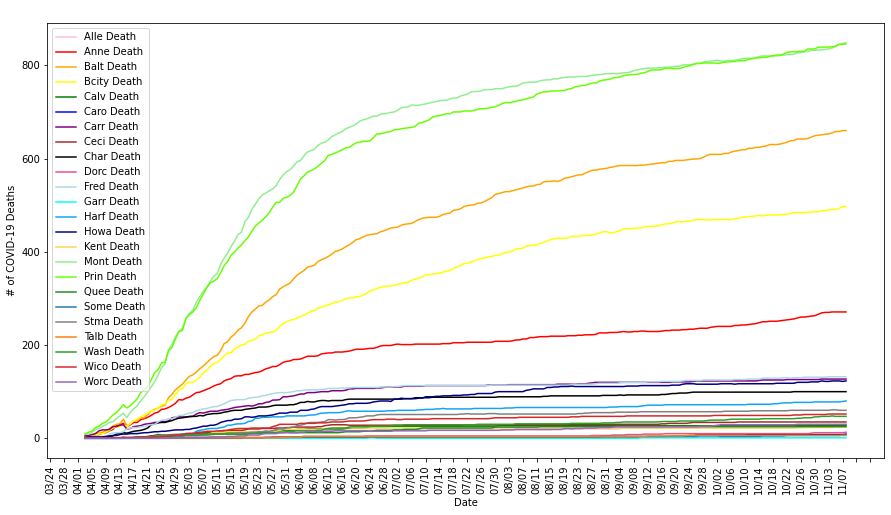

In [13]:
# plot a comparison of COVID-19 deaths in each county
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
x = data["ShortDate"]
y1 = data["deathALLE"]
y2 = data["deathANNE"]
y3 = data["deathBALT"]
y4 = data["deathBCITY"]
y5 = data["deathCALV"]
y6 = data["deathCARO"]
y7 = data["deathCARR"]
y8 = data["deathCECI"]
y9 = data["deathCHAR"]
y10 = data["deathDORC"]
y11 = data["deathFRED"]
y12 = data["deathGARR"]
y13 = data["deathHARF"]
y14 = data["deathHOWA"]
y15 = data["deathKENT"]
y16 = data["deathMONT"]
y17 = data["deathPRIN"]
y18 = data["deathQUEE"]
y19 = data["deathSOME"]
y20 = data["deathSTMA"]
y21 = data["deathTALB"]
y22 = data["deathWASH"]
y23 = data["deathWICO"]
y24 = data["deathWORC"]

ax.plot(x,y1, label="Alle Death", color='pink')
ax.plot(x,y2, label='Anne Death', color='red')
ax.plot(x,y3, label='Balt Death', color='orange')
ax.plot(x,y4, label='Bcity Death', color='yellow')
ax.plot(x,y5, label='Calv Death', color='green')
ax.plot(x,y6, label='Caro Death', color='blue')
ax.plot(x,y7, label='Carr Death', color='purple')
ax.plot(x,y8, label='Ceci Death', color='brown')
ax.plot(x,y9, label='Char Death', color='black')
ax.plot(x,y10, label='Dorc Death',color='#e75480')
ax.plot(x,y11, label='Fred Death', color='#add8e6')
ax.plot(x,y12, label='Garr Death', color='#00FFFF')
ax.plot(x,y13, label='Harf Death', color='#10A5F5')
ax.plot(x,y14, label='Howa Death', color='#000080')
ax.plot(x,y15, label='Kent Death', color='#FDD451')
ax.plot(x,y16, label='Mont Death', color='#90ee90')
ax.plot(x,y17, label='Prin Death', color='#66ff00')
ax.plot(x,y18, label='Quee Death', color='#228B22')
ax.plot(x,y19, label='Some Death')
ax.plot(x,y20, label='Stma Death', color='gray')
ax.plot(x,y21, label='Talb Death')
ax.plot(x,y22, label='Wash Death')
ax.plot(x,y23, label='Wico Death')
ax.plot(x,y24, label='Worc Death')
ax.legend()
plt.title('COVID-19 Deaths in Each County',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))
plt.ylabel('# of COVID-19 Deaths')
plt.show()

The death trend follows the amount of cases with the same 3 counties being the highest in fatality.  It's not suprising that the 3 counties with the highest population suffered the most cases and deaths with COVID-19.  However the overall fatalities for each county are rather low compared to the cumulative cases of COVID-19.

The most inference that could be drawn from that charts that you are more likely to test positive in a high density population.  Which makes sense knowing that virus spreads from close human interaction.

(population found at https://www.maryland-demographics.com/counties_by_population)

Next it's time to see how COVID-19 has impacted the various age groups.  Experts have identified a general trend that older folks are more at risk of dying from COVID-19 but does Maryland follow that trend?  Time to investigate.

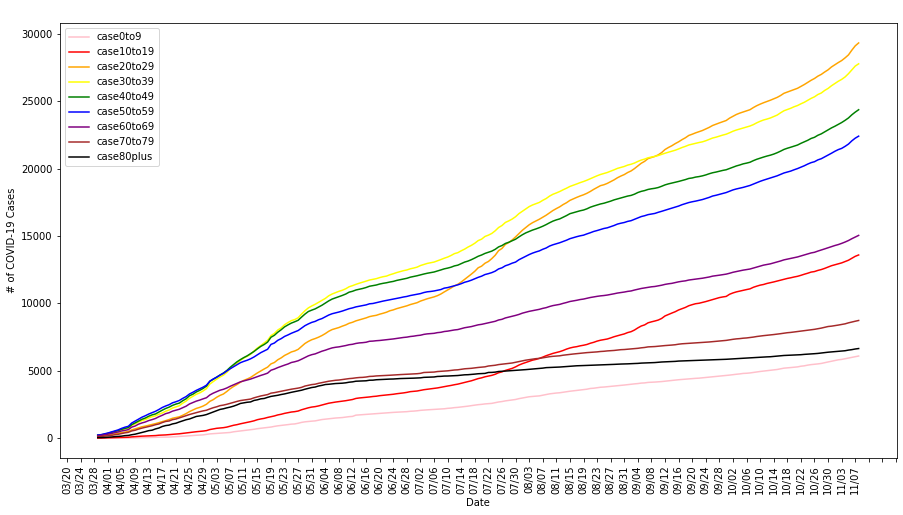

In [14]:
# plot a comparison of COVID-19 cases for various age groups
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
x = data["ShortDate"]
y1 = data["case0to9"]
y2 = data["case10to19"]
y3 = data["case20to29"]
y4 = data["case30to39"]
y5 = data["case40to49"]
y6 = data["case50to59"]
y7 = data["case60to69"]
y8 = data["case70to79"]
y9 = data["case80plus"]

ax.plot(x,y1, label="case0to9", color='pink')
ax.plot(x,y2, label='case10to19', color='red')
ax.plot(x,y3, label='case20to29', color='orange')
ax.plot(x,y4, label='case30to39', color='yellow')
ax.plot(x,y5, label='case40to49', color='green')
ax.plot(x,y6, label='case50to59', color='blue')
ax.plot(x,y7, label='case60to69', color='purple')
ax.plot(x,y8, label='case70to79', color='brown')
ax.plot(x,y9, label='case80plus', color='black')
ax.legend()
plt.title('COVID-19 Cases Among Age Groups',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))
plt.ylabel('# of COVID-19 Cases')
plt.show()

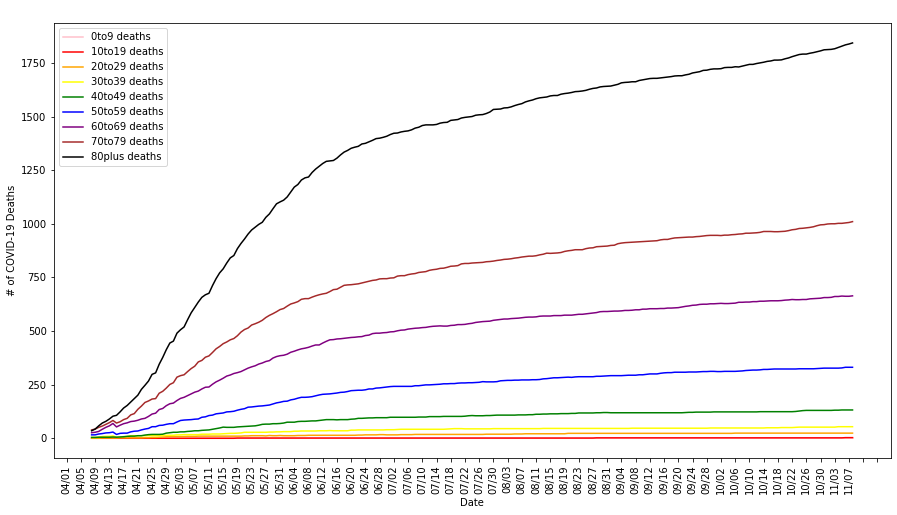

In [15]:
# plot a comparison of COVID-19 deaths for various age groups
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
x = data["ShortDate"]
y1 = data["death0to9"]
y2 = data["death10to19"]
y3 = data["death20to29"]
y4 = data["death30to39"]
y5 = data["death40to49"]
y6 = data["death50to59"]
y7 = data["death60to69"]
y8 = data["death70to79"]
y9 = data["death80plus"]

ax.plot(x,y1, label="0to9 deaths", color='pink')
ax.plot(x,y2, label='10to19 deaths', color='red')
ax.plot(x,y3, label='20to29 deaths', color='orange')
ax.plot(x,y4, label='30to39 deaths', color='yellow')
ax.plot(x,y5, label='40to49 deaths', color='green')
ax.plot(x,y6, label='50to59 deaths', color='blue')
ax.plot(x,y7, label='60to69 deaths', color='purple')
ax.plot(x,y8, label='70to79 deaths', color='brown')
ax.plot(x,y9, label='80plus deaths', color='black')
ax.legend()
plt.title('COVID-19 Deaths Among Age Groups',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))
plt.ylabel('# of COVID-19 Deaths')
plt.show()

These results are more interesting than the county analysis as it shows that while cumulatively more people from the age of 20 to 49 have tested positive for coronavirus, it's the people age 50 to 80 plus that have the high cumulative death toll from COVID-19.

Let's see if we can capture that on a graph.  It would be best to capture the ratio: 

total people who died from COVID-19 / total people who tested positive for COVID-19

In [16]:
#creating the ratio variable
data['ratio0to9'] = data['death0to9']/data['case0to9']
data['ratio10to19'] = data['death10to19']/data['case10to19']
data['ratio20to29'] = data['death20to29']/data['case20to29']
data['ratio30to39'] = data['death30to39']/data['case30to39']
data['ratio40to49'] = data['death40to49']/data['case40to49']
data['ratio50to59'] = data['death50to59']/data['case50to59']
data['ratio60to69'] = data['death60to69']/data['case60to69']
data['ratio70to79'] = data['death70to79']/data['case70to79']
data['ratio80plus'] = data['death80plus']/data['case80plus']

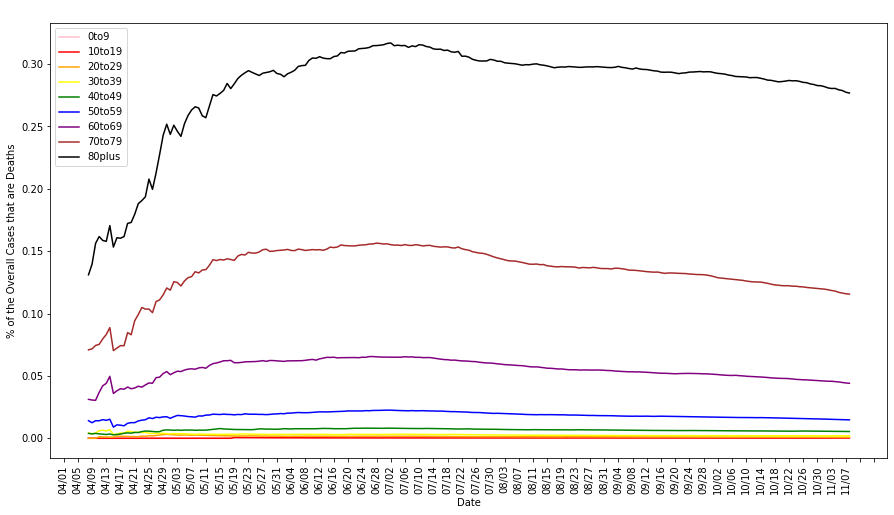

In [17]:
# plot the ratio of COVID-19 cases vs deaths for various age groups
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
x = data["ShortDate"]
y1 = data["ratio0to9"]
y2 = data["ratio10to19"]
y3 = data["ratio20to29"]
y4 = data["ratio30to39"]
y5 = data["ratio40to49"]
y6 = data["ratio50to59"]
y7 = data["ratio60to69"]
y8 = data["ratio70to79"]
y9 = data["ratio80plus"]

ax.plot(x,y1, label="0to9", color='pink')
ax.plot(x,y2, label='10to19', color='red')
ax.plot(x,y3, label='20to29', color='orange')
ax.plot(x,y4, label='30to39', color='yellow')
ax.plot(x,y5, label='40to49', color='green')
ax.plot(x,y6, label='50to59', color='blue')
ax.plot(x,y7, label='60to69', color='purple')
ax.plot(x,y8, label='70to79', color='brown')
ax.plot(x,y9, label='80plus', color='black')
ax.legend()
plt.title('Ratio of COVID-19 Cases vs Deaths Among Age Groups',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))
plt.ylabel('% of the Overall Cases that are Deaths')
plt.show()

As you can see, the ratio shows that roughly 30% of total 80 plus group that caught COVID-19 also passed away from COVID-19, with the next 2 highest age groups showing a similar trend.

In conclusion, areas with high population density are the most likely to have more COVID-19 cases.  Most people tend to recover from COVID-19, but the elderly (60+ groups) should avoid exposing themselves to higher risk.  Since it appears they have a higher rate of passing away from COVID-19.